In [72]:
import requests as req
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cenpy as cen
import pysal
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [73]:
datasets = list(cen.explorer.available(verbose=True).items())

# print first rows of the dataframe containing datasets
pd.DataFrame(datasets).head(50)

,0,1
0,ACSSF5Y2010,2006-2010 American Community Survey 5-Year Est...
1,NONEMP2007,2007 Nonemployer Statistics: Non Employer Stat...
2,POPESTagesex,Vintage 2014 Population Estimates: National An...
3,ZBPTotal2011,2011 County Business Patterns - Zip Code Busin...
4,ITMonthlyImportsUSDA,Time Series International Trade: Monthly U.S. ...
5,POPESTnatmonthly2015,Vintage 2015 Population Estimates: National Mo...
6,POPESTcochar62014,Vintage 2014 Population Estimates: County Popu...
7,ITMonthlyExportsHitech,Time Series International Trade: Monthly U.S. ...
8,ZBPTotal2013,2013 County Business Patterns - Zip Code Busin...
9,EconCensusEWKS2007,2007 Economic Census - All Sectors: Economy-Wi...


In [74]:
dataset_1 = 'ASECSCBO2014'
dataset_2 = 'ASECSA2014'
dataset_3 = 'ASECSCB2014'

In [75]:
con_1 = cen.base.Connection(dataset_1)
con_2 = cen.base.Connection(dataset_2)
con_3 = cen.base.Connection(dataset_3)
con_3

Connection to 2014 Annual Survey of Entrepreneurs: Characteristics of Businesses (ID: http://api.census.gov/data/id/ASECSCB2014)

In [76]:
print(type(con_1))
print(type(con_1.geographies))
print(con_1.geographies.keys())

<class 'cenpy.remote.APIConnection'>
<class 'dict'>
dict_keys(['fips'])


In [77]:
con_1.variables

,concept,group,label,limit,predicateOnly,predicateType,required,validValues
ACQBUS,Economic Statistics,N/A,How the owner initially acquired the business ...,0,NaN,string,default displayed,[]
ACQBUS_TTL,Economic Statistics,N/A,How the owner initially acquired the business ...,0,NaN,string,NaN,[]
ASECBO,Economic Statistics,N/A,"Gender, ethnicity, race, and veteran status code",0,NaN,string,default displayed,[]
ASECBO_TTL,Economic Statistics,N/A,"Gender, ethnicity, race, and veteran status co...",0,NaN,string,NaN,[]
EDUC,Economic Statistics,N/A,Highest degree or level of school completed pr...,0,NaN,string,default displayed,[]
EDUC_TTL,Economic Statistics,N/A,Highest degree or level of school completed pr...,0,NaN,string,NaN,[]
FOOTID_GEO,Geographic Characteristics,N/A,Geo Footnote,0,NaN,string,NaN,[]
FOOTID_NAICS,Industry classification,N/A,Naics Footnote,0,NaN,string,NaN,[]
GEOTYPE,Geographic Characteristics,N/A,Geography Summary Level,0,NaN,int,NaN,[]
GEO_ID,Selectable Geographies,N/A,Geographic identifier code,0,NaN,string,NaN,[]


In [78]:
cols_1 = ['ACQBUS','ACQBUS_TTL','ASECBO','ASECBO_TTL']#,'EDUC','EDUC_TTL','GEO_ID','GEO_TTL','OWNPDEMP','OWNPDEP_PCT','OWNRAGE']
cols_2 = ['EMP','EMP_F','EMPSZFI','EMPSZFI_TTL']
cols_2b = ['FIRMPDEMP','FIRMPDEMP_F','SEX','SEX_TTL','RACE_GROUP','RACE_GROUP_TTL']
cols_3 = ['ASECBO','ASECBO_TTL','EDUC','EDUC_TTL','ACQBUS','ACQBUS_TTL','OWNPDEMP','OWNPDEMP_F']
cols_3b = ['ACQBUSCAP','ACQBUSCAP_TTL','PROFIT','PROFIT_TTL','STRTSRCE','STRTSRCE_TTL','YIBSZFI','YIBSZFI_TTL','FIRMPDEMP','FIRMPDEMP_F']

In [79]:
data = con_2.query(cols_2,geo_unit ='state:*', geo_filter = {})

C:\Users\thela\Anaconda3\lib\site-packages\cenpy\remote.py:172: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [80]:
data.head()

,EMP,EMP_F,EMPSZFI,EMPSZFI_TTL,state
0,1486972,None,1,All firms,01
1,0,None,611,Firms with no employees,01
2,64922,None,612,Firms with 1 to 4 employees,01
3,87298,None,620,Firms with 5 to 9 employees,01
4,106273,None,630,Firms with 10 to 19 employees,01


In [81]:
data['state_name'] = ''

In [82]:
state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}

In [83]:
data[data['EMPSZFI_TTL'] == 'All firms'].pivot_table('EMP', index='state', aggfunc='sum')

,EMP
state,
01,1486972
02,218707
04,2135072
05,924191
06,13237392
08,2053107
09,1481983
10,384547
11,433282


In [84]:
def state_abb(data):
    data['state'] = data['state'].replace('01','AL')
    data['state'] = data['state'].replace('02','AK')
    data['state'] = data['state'].replace('04','AZ')
    data['state'] = data['state'].replace('05','AR')
    data['state'] = data['state'].replace('06','CA')
    data['state'] = data['state'].replace('08','CO')
    data['state'] = data['state'].replace('09','CT')
    data['state'] = data['state'].replace('10','DE')
    data['state'] = data['state'].replace('11','DC')
    data['state'] = data['state'].replace('12','FL')
    data['state'] = data['state'].replace('13','GA')
    data['state'] = data['state'].replace('15','HI')
    data['state'] = data['state'].replace('16','ID')
    data['state'] = data['state'].replace('17','IL')
    data['state'] = data['state'].replace('18','IN')
    data['state'] = data['state'].replace('19','IA')
    data['state'] = data['state'].replace('20','KS')
    data['state'] = data['state'].replace('21','KY')
    data['state'] = data['state'].replace('22','LA')
    data['state'] = data['state'].replace('23','ME')
    data['state'] = data['state'].replace('24','MD')
    data['state'] = data['state'].replace('25','MA')
    data['state'] = data['state'].replace('26','MI')
    data['state'] = data['state'].replace('27','MN')
    data['state'] = data['state'].replace('28','MS')
    data['state'] = data['state'].replace('29','MO')
    data['state'] = data['state'].replace('30','MT')
    data['state'] = data['state'].replace('31','NE')
    data['state'] = data['state'].replace('32','NV')
    data['state'] = data['state'].replace('33','NH')
    data['state'] = data['state'].replace('34','NJ')
    data['state'] = data['state'].replace('35','NM')
    data['state'] = data['state'].replace('36','NY')
    data['state'] = data['state'].replace('37','NC')
    data['state'] = data['state'].replace('38','ND')
    data['state'] = data['state'].replace('39','OH')
    data['state'] = data['state'].replace('40','OK')
    data['state'] = data['state'].replace('41','OR')
    data['state'] = data['state'].replace('42','PA')
    data['state'] = data['state'].replace('44','RI')
    data['state'] = data['state'].replace('45','SC')
    data['state'] = data['state'].replace('46','SD')
    data['state'] = data['state'].replace('47','TN')
    data['state'] = data['state'].replace('48','TX')
    data['state'] = data['state'].replace('49','UT')
    data['state'] = data['state'].replace('50','VT')
    data['state'] = data['state'].replace('51','VA')
    data['state'] = data['state'].replace('53','WA')
    data['state'] = data['state'].replace('54','WV')
    data['state'] = data['state'].replace('55','WI')
    data['state'] = data['state'].replace('56','WY')

In [85]:
state_abb(data)

In [86]:
data['state'].value_counts()

ID    10
NM    10
NH    10
AZ    10
TN    10
WY    10
NY    10
MO    10
IA    10
ND    10
PA    10
KS    10
HI    10
DC    10
DE    10
MS    10
AK    10
OR    10
MN    10
IN    10
RI    10
MI    10
NC    10
IL    10
AR    10
MD    10
NE    10
MT    10
VA    10
AL    10
SC    10
WV    10
OH    10
UT    10
MA    10
NJ    10
TX    10
VT    10
KY    10
WA    10
OK    10
CT    10
WI    10
ME    10
CA    10
SD    10
GA    10
FL    10
CO    10
NV    10
LA    10
Name: state, dtype: int64

In [87]:
total_emp = data[data['EMPSZFI_TTL'] == 'All firms'].pivot_table('EMP', index='state', aggfunc='sum')
total_emp

,EMP
state,
AK,218707
AL,1486972
AR,924191
AZ,2135072
CA,13237392
CO,2053107
CT,1481983
DC,433282
DE,384547


In [88]:
total_emp.to_csv('total_emp.csv')

In [89]:
st_codes = list(state_codes.keys())

In [90]:
st_codes

['WA',
 'DE',
 'DC',
 'WI',
 'WV',
 'HI',
 'FL',
 'WY',
 'PR',
 'NJ',
 'NM',
 'TX',
 'LA',
 'NC',
 'ND',
 'NE',
 'TN',
 'NY',
 'PA',
 'AK',
 'NV',
 'NH',
 'VA',
 'CO',
 'CA',
 'AL',
 'AR',
 'VT',
 'IL',
 'GA',
 'IN',
 'IA',
 'MA',
 'AZ',
 'ID',
 'CT',
 'ME',
 'MD',
 'OK',
 'OH',
 'UT',
 'MO',
 'MN',
 'MI',
 'RI',
 'KS',
 'MT',
 'MS',
 'SC',
 'KY',
 'OR',
 'SD']

In [91]:
total_emp['EMP'].index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [92]:
state_data = pd.read_csv('total_emp.csv',delimiter=',')

In [93]:
scl = [[0.1, 'rgb(242,240,247)'],[0.25, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.65, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1, 'rgb(84,39,143)']]

info = [ dict(
        type='choropleth',
        colorscale = 'Reds',
        autocolorscale = False,
        locations = state_data['state'],
        z = state_data['EMP'],
        text = state_data['state'],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Total Employees"
        )
    ) ]

layout = dict(
        title = '2014 Entrepreneur Employment Data<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

#fig = dict(data=info,layout=layout)
choromap = go.Figure(data=info,layout=layout)

In [94]:
plotly.offline.plot(choromap)

'file://C:\\Users\\thela\\OneDrive\\UCB Data Bootcamp\\Census Project\\temp-plot.html'

In [95]:
sum(state_data['EMP'])

115129294

In [96]:
data2 = con_2.query(cols_2b,geo_unit ='state:*', geo_filter = {})

C:\Users\thela\Anaconda3\lib\site-packages\cenpy\remote.py:172: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [97]:
data2.head(500)

,FIRMPDEMP,FIRMPDEMP_F,SEX,SEX_TTL,RACE_GROUP,RACE_GROUP_TTL,state
0,66709,None,1,All firms,0,All firms,01
1,11363,None,2,Female-owned,0,All firms,01
2,42803,None,3,Male-owned,0,All firms,01
3,7401,None,4,Equally male-/female-owned,0,All firms,01
4,61568,None,96,"All firms classifiable by gender, ethnicity, r...",0,All firms,01
5,5141,None,98,Publicly held and other firms not classifiable...,0,All firms,01
6,54575,None,1,All firms,30,White,01
7,9829,None,2,Female-owned,30,White,01
8,38803,None,3,Male-owned,30,White,01
9,5943,None,4,Equally male-/female-owned,30,White,01


In [98]:
data2[data2['RACE_GROUP'] == 30]

,FIRMPDEMP,FIRMPDEMP_F,SEX,SEX_TTL,RACE_GROUP,RACE_GROUP_TTL,state
6,54575,None,1,All firms,30,White,01
7,9829,None,2,Female-owned,30,White,01
8,38803,None,3,Male-owned,30,White,01
9,5943,None,4,Equally male-/female-owned,30,White,01
50,11995,None,1,All firms,30,White,02
51,2723,None,2,Female-owned,30,White,02
52,7036,None,3,Male-owned,30,White,02
53,2237,None,4,Equally male-/female-owned,30,White,02
94,80911,None,1,All firms,30,White,04
95,16863,None,2,Female-owned,30,White,04


In [99]:
sex_data = data2.groupby(['SEX_TTL']).sum()
sex_data

,FIRMPDEMP,SEX,RACE_GROUP
SEX_TTL,,,
All firms,21732645,612,40647
"All firms classifiable by gender, ethnicity, race, and veteran status",5241912,4896,0
Equally male-/female-owned,2310141,2040,30753
Female-owned,3204897,1020,30753
Male-owned,10213734,1530,30753
"Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status",380992,4998,0


In [100]:
sex_data2 = sex_data.drop('All firms')
sex_data2

,FIRMPDEMP,SEX,RACE_GROUP
SEX_TTL,,,
"All firms classifiable by gender, ethnicity, race, and veteran status",5241912,4896,0
Equally male-/female-owned,2310141,2040,30753
Female-owned,3204897,1020,30753
Male-owned,10213734,1530,30753
"Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status",380992,4998,0


In [101]:
sex_data2 = sex_data.drop(['All firms','All firms classifiable by gender, ethnicity, race, and veteran status'])
sex_data2

,FIRMPDEMP,SEX,RACE_GROUP
SEX_TTL,,,
Equally male-/female-owned,2310141,2040,30753
Female-owned,3204897,1020,30753
Male-owned,10213734,1530,30753
"Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status",380992,4998,0


In [102]:
sex_data2['FIRMPDEMP'].sum()

16109764

In [103]:
labels = sex_data2.index.unique()
values = list(sex_data2['FIRMPDEMP'])
values

[2310141, 3204897, 10213734, 380992]

In [104]:
trace = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='#000000', width=1.5)),textfont=dict(color='white'))
plotly.offline.plot([trace], filename ='basic_pie_chart.html')

'file://C:\\Users\\thela\\OneDrive\\UCB Data Bootcamp\\Census Project\\basic_pie_chart.html'

In [105]:
race_data = data2.groupby(['RACE_GROUP_TTL']).sum()
race_data

,FIRMPDEMP,SEX,RACE_GROUP
RACE_GROUP_TTL,,,
All firms,16487721,10404,0
"All firms classifiable by gender, ethnicity, race, and veteran status",5241912,51,4896
American Indian and Alaska Native,54033,510,10200
Asian,1017403,510,12240
Black or African American,217834,510,8160
Equally minority/nonminority,150664,510,18564
Minority,1906346,510,18360
Native Hawaiian and Other Pacific Islander,9469,510,14280
Nonminority,8426821,510,18768


In [106]:
race_data2 = race_data.drop(['All firms','All firms classifiable by gender, ethnicity, race, and veteran status'])
race_data2.sum()

FIRMPDEMP     21354688
SEX               4641
RACE_GROUP      128010
dtype: int64

In [107]:
labels = race_data2.index.unique()
values = list(race_data2['FIRMPDEMP'])
layout = go.Layout(title='Breakdown of businesses owned by race/ethnic group')
colors = ['rgb(165,70,38)', 'rgb(215,48,39)','rgb(244,109,67)','rgb(253,174,97)', 'rgb(254,224,144)','rgb(224,142,248)', 'rgb(171,217,233)', 'rgb(116,173,209)', 'rgb(69,117,180)', 'rgb(49,54,149)']

In [108]:
trace = go.Pie(labels=labels, values=values,pull = 0.05, marker=dict(line=dict(color='#000000', width=1.5)),textfont=dict(color='white'))
plotly.offline.plot([trace], filename ='styled_pie_chart.html')

'file://C:\\Users\\thela\\OneDrive\\UCB Data Bootcamp\\Census Project\\styled_pie_chart.html'

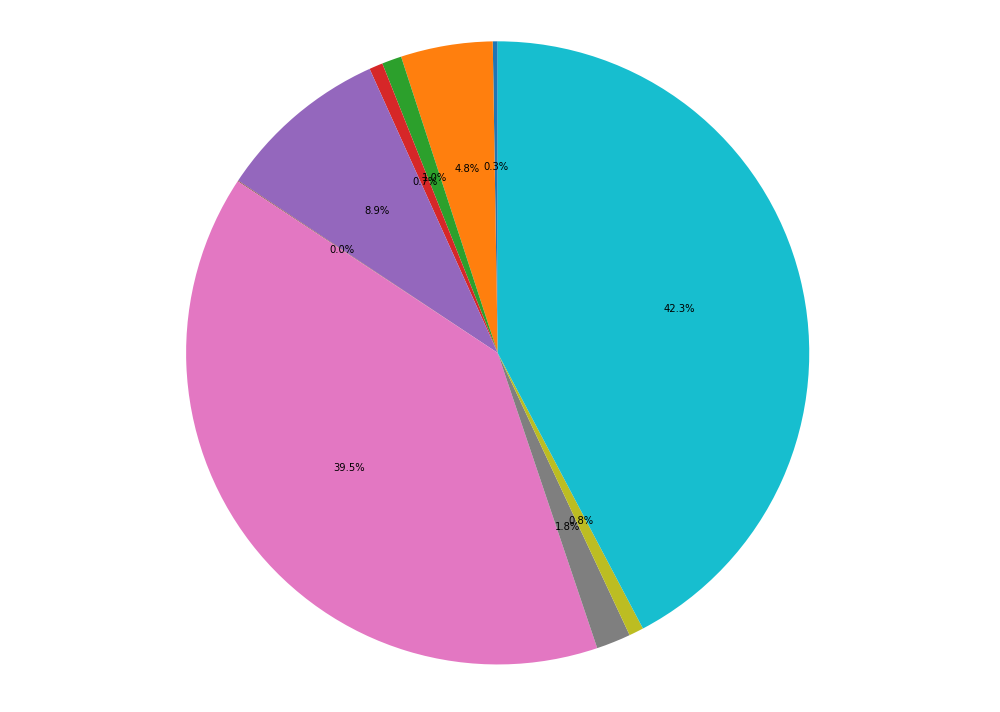

In [109]:
fig, ax = plt.subplots(figsize=(14,10))
ax.pie(values,autopct='%1.1f%%',shadow=False,startangle=90)
ax.axis('equal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [110]:
race_state_data = data2.groupby(['state']).sum()
race_state_data

,FIRMPDEMP,SEX,RACE_GROUP
state,,,
01,507683,296,2606
02,114545,296,2606
04,744570,296,2606
05,350570,296,2606
06,5274493,296,2606
08,936123,296,2606
09,513704,296,2606
10,131686,296,2606
11,98852,296,2606


In [111]:
total_bus = data2[data2['RACE_GROUP_TTL'] == 'All firms'].pivot_table('FIRMPDEMP', index='state', aggfunc='sum')
total_bus

,FIRMPDEMP
state,
01,194985
02,44570
04,285214
05,135219
06,2010439
08,358555
09,197827
10,51435
11,39813


In [112]:
total_bus.index

Index(['01', '02', '04', '05', '06', '08', '09', '10', '11', '12', '13', '15',
       '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', '53',
       '54', '55', '56'],
      dtype='object', name='state')

In [113]:
scl = [[0.1, 'rgb(242,240,247)'],[0.25, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.65, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1, 'rgb(84,39,143)']]

info = [ dict(
        type='choropleth',
        colorscale = 'Reds',
        autocolorscale = False,
        locations = total_bus.index,
        z = total_bus['FIRMPDEMP'],
        text = total_bus.index,
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Total Businesses"
        )
    ) ]

layout = dict(
        title = '2014 Entrepreneur Employment Data: Total Businesses by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

#fig = dict(data=info,layout=layout)
choromap2 = go.Figure(data=info,layout=layout)

In [114]:
plotly.offline.plot(choromap2)

'file://C:\\Users\\thela\\OneDrive\\UCB Data Bootcamp\\Census Project\\temp-plot.html'

In [115]:
data3 = con_1.query(cols_3,geo_unit ='state:*', geo_filter = {})

C:\Users\thela\Anaconda3\lib\site-packages\cenpy\remote.py:172: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [116]:
state_abb(data3)

In [117]:
data3.head(20)

,ASECBO,ASECBO_TTL,EDUC,EDUC_TTL,ACQBUS,ACQBUS_TTL,OWNPDEMP,OWNPDEMP_F,state
0,0,All owners of respondent firms,NaN,Less than high school graduate,0.0,All owners of respondent firms,2102,None,AL
1,0,All owners of respondent firms,NaN,High school graduate - diploma or GED,0.0,All owners of respondent firms,13745,None,AL
2,0,All owners of respondent firms,NaN,"Technical, trade, or vocational school",0.0,All owners of respondent firms,3393,None,AL
3,0,All owners of respondent firms,NaN,"Some college, but no degree",0.0,All owners of respondent firms,11195,None,AL
4,0,All owners of respondent firms,NaN,Associate degree,0.0,All owners of respondent firms,3451,None,AL
5,0,All owners of respondent firms,NaN,Bachelor's degree,0.0,All owners of respondent firms,21210,None,AL
6,0,All owners of respondent firms,NaN,"Master's, doctorate, or professional degree",0.0,All owners of respondent firms,15638,None,AL
7,0,All owners of respondent firms,NaN,Total reporting,0.0,All owners of respondent firms,70735,None,AL
8,0,All owners of respondent firms,NaN,Item not reported,0.0,All owners of respondent firms,133,None,AL
9,0,All owners of respondent firms,0.0,All owners of respondent firms,NaN,Founded or started,47671,None,AL


In [118]:
educ_data = data3.groupby(['EDUC_TTL']).sum()

In [119]:
educ_data = educ_data.drop(['All owners of respondent firms','Total reporting'])

In [120]:
educ_data.index

Index(['Associate degree', 'Bachelor's degree',
       'High school graduate - diploma or GED', 'Item not reported',
       'Less than high school graduate',
       'Master's, doctorate, or professional degree',
       'Some college, but no degree',
       'Technical, trade, or vocational school'],
      dtype='object', name='EDUC_TTL')

In [121]:
trace_bar = go.Bar(x=educ_data.index,y=educ_data['OWNPDEMP'],marker=dict(color='Reds'))

In [122]:
bar_data = [trace_bar]
bar_layout = go.Layout(title='Education Levels of Business Owners - 2014')
fig = go.Figure(data=bar_data,layout=bar_layout)

In [123]:
plotly.offline.plot(fig, filename='angled-text-bar')

C:\Users\thela\Anaconda3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `angled-text-bar` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\thela\\OneDrive\\UCB Data Bootcamp\\Census Project\\angled-text-bar.html'

In [124]:
aquire_data = data3.groupby(['ACQBUS_TTL']).sum()
aquire_data = aquire_data.drop(['All owners of respondent firms','Total reporting'])
aquire_data

,ASECBO,EDUC,ACQBUS,OWNPDEMP
ACQBUS_TTL,,,,
Founded or started,0,0.0,NaN,4115392
Inherited,0,0.0,NaN,242102
Item not reported,0,0.0,NaN,15033
Purchased,0,0.0,NaN,1258947
Transfer of ownership or gift,0,0.0,NaN,430467


In [125]:
trace_bar2 = go.Bar(x=aquire_data.index,y=aquire_data['OWNPDEMP'],marker=dict(color='Reds'))
bar2_data = [trace_bar2]
bar2_layout = go.Layout(title='Business Aquisition Methods of Owners - 2014')
fig2 = go.Figure(data=bar2_data,layout=bar2_layout)

In [126]:
plotly.offline.plot(fig2)

'file://C:\\Users\\thela\\OneDrive\\UCB Data Bootcamp\\Census Project\\temp-plot.html'

In [127]:
data4 = con_3.query(cols_3b,geo_unit ='state:*', geo_filter = {})

C:\Users\thela\Anaconda3\lib\site-packages\cenpy\remote.py:172: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [128]:
state_abb(data4)

In [129]:
data4.head(50)

,ACQBUSCAP,ACQBUSCAP_TTL,PROFIT,PROFIT_TTL,STRTSRCE,STRTSRCE_TTL,YIBSZFI,YIBSZFI_TTL,FIRMPDEMP,FIRMPDEMP_F,state
0,A1,All firms,A1,All firms,A1,All firms,1,All firms,66709,None,AL
1,A1,All firms,A1,All firms,FX,Personal/family savings of owner(s),1,All firms,26167,None,AL
2,A1,All firms,A1,All firms,FY,Personal/family assets other than savings of o...,1,All firms,4955,None,AL
3,A1,All firms,A1,All firms,FZ,Personal/family home equity loan,1,All firms,3084,None,AL
4,A1,All firms,A1,All firms,GA01,Personal credit card(s) carrying balances,1,All firms,4209,None,AL
5,A1,All firms,A1,All firms,GA02,Business credit card(s) carrying balances,1,All firms,2124,None,AL
6,A1,All firms,A1,All firms,GB,"Business loan from federal, state, or local go...",1,All firms,281,None,AL
7,A1,All firms,A1,All firms,GC,Government-guaranteed business loan from a ban...,1,All firms,851,None,AL
8,A1,All firms,A1,All firms,GD,Business loan from a bank or financial institu...,1,All firms,12831,None,AL
9,A1,All firms,A1,All firms,GE,Business loan/investment from family/friends,1,All firms,2181,None,AL


In [130]:
purch_data = data4.groupby(['ACQBUSCAP_TTL']).sum()
purch_data = purch_data.drop(['All firms','Total reporting'])
purch_data

,YIBSZFI,FIRMPDEMP
ACQBUSCAP_TTL,,
"$1,000,000 to $2,999,999",51,61096
"$10,000 to $24,999",51,466961
"$100,000 to $249,999",51,397205
"$25,000 to $49,999",51,369422
"$250,000 to $999,999",51,264805
"$3,000,000 or more",51,36185
"$5,000 to $9,999",51,326750
"$50,000 to $99,999",51,401022
Don't know,51,755311


In [131]:
trace_bar3 = go.Bar(x=purch_data.index,y=purch_data['FIRMPDEMP'],marker=dict(color='Reds'))
bar3_data = [trace_bar3]
bar3_layout = go.Layout(title='Initial Start up costs for new businesses - 2014')
fig3 = go.Figure(data=bar3_data,layout=bar3_layout)

In [132]:
plotly.offline.plot(fig3,filename='angled-text-bar')

C:\Users\thela\Anaconda3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `angled-text-bar` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\thela\\OneDrive\\UCB Data Bootcamp\\Census Project\\angled-text-bar.html'

In [133]:
source_data = data4.groupby(['STRTSRCE_TTL']).sum()
source_data = source_data.drop(['All firms','Total reporting'])
source_data

,YIBSZFI,FIRMPDEMP
STRTSRCE_TTL,,
Business credit card(s) carrying balances,51,210859
Business loan from a bank or financial institution,51,715754
"Business loan from federal, state, or local government",51,17101
Business loan/investment from family/friends,51,198579
Don't know,51,451111
Government-guaranteed business loan from a bank or financial institution,51,75478
Grants,51,10470
Investment by venture capitalist(s),51,25950
Item not reported,51,32704


In [134]:
trace_bar4 = go.Bar(x=source_data.index,y=source_data['FIRMPDEMP'],marker=dict(color='Reds'))
bar4_data = [trace_bar4]
bar4_layout = go.Layout(title='Source of intial start up costs for new businesses - 2014')
fig4 = go.Figure(data=bar4_data,layout=bar4_layout)

In [135]:
plotly.offline.plot(fig4,filename='angled-text-bar')

C:\Users\thela\Anaconda3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `angled-text-bar` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\thela\\OneDrive\\UCB Data Bootcamp\\Census Project\\angled-text-bar.html'